## embedding方法

In [6]:
import tensorflow as tf
from tensorflow.keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
import numpy as np

In [3]:
max_features = 10000
maxlen = 20

In [14]:
(train_data, train_labels), (test_data, test_labels)  = imdb.load_data(num_words=max_features)

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 29s 18us/step


In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
x_train.shape

(25000, 10000)

In [24]:
print('Loading Data...')
(x_train, y_train), (x_test, y_test)  = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples * times)')
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print('x train shape:', x_train.shape)
print('x test shape:', x_test.shape)

Loading Data...
25000 train sequences
25000 test sequences
Pad sequences (samples * times)
x train shape: (25000, 20)
x test shape: (25000, 20)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 8, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train,
                   epochs=10, 
                   batch_size = 32,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 44us/sample - loss: 0.6702 - acc: 0.6253 - val_loss: 0.6247 - val_acc: 0.7024
Epoch 2/10
20000/20000 [==============================] - 1s 29us/sample - loss: 0.5507 - acc: 0.7505 - val_loss: 0.5327 - val_acc: 0.7300
Epoch 3/10
20000/20000 [==============================] - 1s 28us/sample - loss: 0.4669 - acc: 0.7887 - val_loss: 0.5036 - val_acc: 0.7430
Epoch 4/10
20000/20000 [==============================] - 1s 28us/sample - loss: 0.4214 - acc: 0.8120 - val_loss: 0.4964 - val_acc: 0.7492
Epoch 5/10
20000/20000 [==============================] - 1s 28us/sample - loss: 0.3895 - acc: 0.8296 - val_loss: 0.4951 - val_acc: 0.7522
Epoch 6/10
20000/20000 [==============================] - 1s 29us/sample - loss: 0.3630 - acc: 0.8431 - val_loss: 0.4982 - val_acc: 0.7516
Epoch 7/10
20000/20000 [==============================] - 1s 29us/sample - loss: 0.3394 - acc: 0.8575 - val_loss: 0.5

In [ ]:
history.history.keys()

In [29]:
def show_history(history, epochs):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 8))
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(epochs_range, loss, label='Training Loss')
    ax1.plot(epochs_range, val_loss, label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_title('Training and Validation Loss')

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(epochs_range, acc, label='Training acc')
    ax2.plot(epochs_range, val_acc, label='Validation acc')
    ax2.legend(loc='upper right')
    ax2.set_title('Training and Validation Acc')
    plt.show()

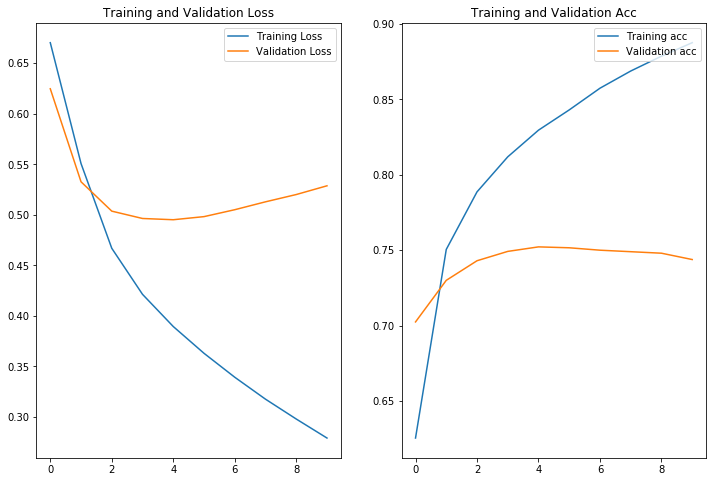

In [30]:
show_history(history, 10)